In [1]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
path = "youtube_comments_climate_change/cleaned_data.csv"
data = pd.read_csv(path, sep=",", encoding='utf-8')

list(data.columns)

['Unnamed: 0', 'publishedAt', 'authorName', 'text', 'isReply', 'cleaned']

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

hub_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.KerasLayer(hub_url)
embeddings = embed(data['cleaned'])

print(embeddings)
print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

tf.Tensor(
[[ 0.02267956 -0.06716511  0.01718922 ... -0.0158857  -0.043926
  -0.00393031]
 [ 0.04192     0.07056528  0.09499479 ... -0.03520851 -0.0134883
   0.04670066]
 [-0.06692986 -0.00541758 -0.03079402 ...  0.02694076 -0.01263959
  -0.07979716]
 ...
 [-0.01887087  0.06309654  0.10515169 ... -0.01325583 -0.04266983
   0.01906748]
 [ 0.01090654 -0.08720968 -0.00068635 ...  0.00569523 -0.01905336
  -0.04718436]
 [ 0.0252452  -0.01673799 -0.06606336 ... -0.00096804 -0.04874957
  -0.04058736]], shape=(25914, 512), dtype=float32)
The embeddings vector is of fixed length 512


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity

cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

[[ 1.0000002   0.00968165  0.12730817 ... -0.04107114  0.24598777
   0.35544437]
 [ 0.00968165  1.          0.027156   ...  0.5482285   0.0241364
   0.05005576]
 [ 0.12730817  0.027156    0.99999964 ...  0.20292103  0.16645284
   0.04606095]
 ...
 [-0.04107114  0.5482285   0.20292103 ...  1.0000002   0.02003537
   0.01877565]
 [ 0.24598777  0.0241364   0.16645284 ...  0.02003537  1.
   0.21783942]
 [ 0.35544437  0.05005576  0.04606095 ...  0.01877565  0.21783942
   1.0000001 ]]


### PCA

#### Choosing dimensions by looking at cumulative explained variance ration

In [8]:
X_embed = [np.array(emb) for emb in embeddings]
X = np.array([emb for emb in X_embed])

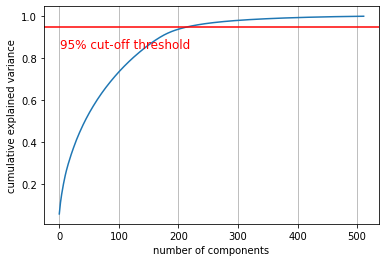

In [38]:
import matplotlib.pyplot as plt

pca_cev = PCA().fit(X)
plt.plot(np.cumsum(pca_cev.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(axis='x')

In [39]:
SUBSPACE_DIM = 200

pca = PCA(n_components= SUBSPACE_DIM)
pca.fit(X)
X_new = pca.transform(X)
pca_dim = X_new.shape[1]

X_list = [ list(X_new[i]) for i in range(X_new.shape[0])]

print("Dimensions of embeddings matrix after PCA: ({}, {})".format(X_new.shape[0], X_new.shape[1]))

Dimensions of embeddings matrix after PCA: (25914, 200)


In [13]:
print(pca.components_)

[[-0.00780599 -0.03863785 -0.04079175 ...  0.02234746 -0.05901832
  -0.01317494]
 [ 0.02689727 -0.01900056 -0.05319673 ... -0.01570138 -0.05129658
   0.02197856]
 [ 0.00047537 -0.02613148  0.01401809 ... -0.04234459 -0.03295079
  -0.04579633]
 ...
 [-0.02740343 -0.00414352 -0.06780858 ...  0.00804133 -0.05127814
   0.03045296]
 [ 0.07848544 -0.02882785 -0.00122972 ...  0.05507728  0.0025011
   0.0345578 ]
 [ 0.04792375  0.04653661 -0.02814643 ... -0.00885726 -0.04198137
  -0.01115397]]


In [14]:
print(pca.explained_variance_)

[0.05072124 0.0267245  0.02206992 0.01839701 0.01720354 0.01545914
 0.0149087  0.01341941 0.01288095]


ValueError: too many values to unpack (expected 2)

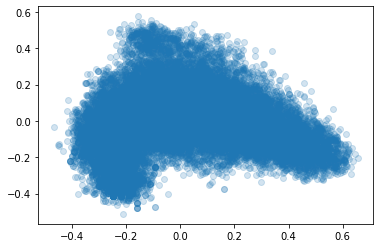

In [40]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2)
#plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');